In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import shutup

In [18]:
shutup.please()

In [19]:
dailydata = pd.read_csv('../data/co2-ppm-daily_csv.csv')
problemdata = pd.read_csv('../data/ppm.csv')

In [20]:
year_lengths = []
j = 1991
dates = [dailydata.iloc[i][0] for i in range(len(dailydata))]
yeardates = [i for i in dates if i.split('-')[0] == str(j)]
year_data = dailydata.loc[dailydata['date'].isin(yeardates)]
print(j, len(year_data))
year_lengths.append((j, len(year_data)))

print(max(year_lengths, key=lambda x: x[1]))

1991 359
(1991, 359)


In [21]:
num_years = len(problemdata)

In [22]:
YEAR = str(1991)

x_daily, y_daily = list(map(lambda x: x/359, range(359))), list(year_data.value)
x_yearly, y_yearly = list(problemdata.Year), list(problemdata.PPM)

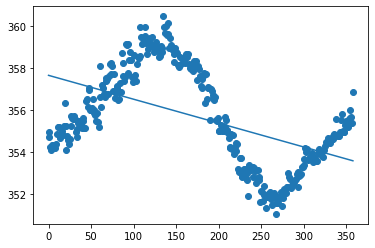

In [85]:
a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a*x+b)

def cos_func(times, amp, freq, y=355.6131):
    inside = freq*times
    middle = amp*np.cos(inside)

    return middle + y

(x[list(y).index(min(y))] - x[list(y).index(max(y))])*2

popt, pcov = curve_fit(
    cos_func,
    x, y,
    p0=((max(y)-min(y))/2, 2*np.pi/300)
)

plt.plot(x, y, '.', label='Measured')
plt.plot(x, cos_func(pd.Series(x), popt[0], popt[1]), label='Best Fit')
plt.plot(x, cos_func(pd.Series(x), (max(y)-min(y))/2, 2*np.pi/300))

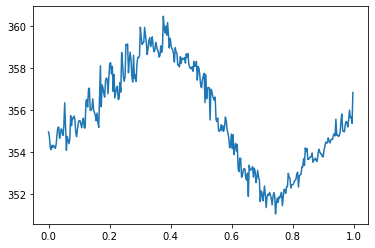

In [23]:
plt.plot(x_daily, y_daily)

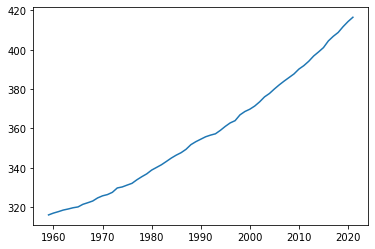

In [24]:
plt.plot(x_yearly, y_yearly)

In [25]:
base_slope = float((problemdata.iloc[32][1] - problemdata.iloc[33][1])/(1991-1992))

In [26]:
y_at_1991 = y_yearly[x_yearly.index(1991)]

In [49]:
def translate_by_starting_point(year, data):
    year_start = y_yearly[x_yearly.index(year)]
    difference = y_at_1991 - year_start
    new_data = []
    for i in data:
        new_data.append(i-difference)
    
    return new_data

def shift_with_slope(slope, data):
    new_data = []
    try:
        for ind, val in enumerate(data):
            difference = (slope-base_slope)*(ind/359)
            new_data.append(val + difference)
    except TypeError:
        print(ind)
    
    return new_data



# method doesn't work due to limitation of angle; angle cannot go beyond 90 degrees
def slope_with_respect_to_base(slope, base_slope):
    return np.math.tan(np.math.atan(slope) - np.math.atan(base_slope))

In [34]:
sum(year_data.iloc[i][1] for i in range(len(year_data))) / len(year_data)

355.61309192200554

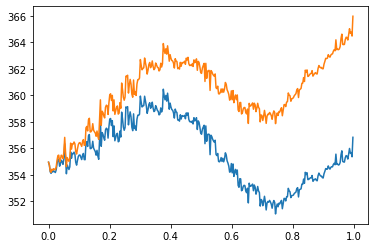

In [47]:
plt.plot(x_daily, y_daily)
# shifted_y_daily = []

plt.plot(x_daily, shift_with_slope(10, y_daily))
# plt.plot(x_yearly, y_yearly)

In [37]:
slope_with_respect_to_base(1, base_slope)

0.08695652173911154

In [52]:
interpol_data_y = pd.Series()

slopes = []

for ind, val in enumerate(x_yearly[:-1]):
    slope = y_yearly[ind+1] - y_yearly[ind]

    # slope_w_respect = slope_with_respect_to_base(slope, base_slope)

    # slopes.append(slope_w_respect)

    x_values = [i / 359 + val-1959 for i in range(359)]
    # new_data = pd.Series(y_daily) + [i*slope_w_respect for i in x_values] - sum(y_daily)/len(y_daily)
    new_data = shift_with_slope(slope, translate_by_starting_point(val, y_daily))
    interpol_data_y = interpol_data_y.append(pd.Series(new_data))


<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [341]:
slopes

[0.05052773411181958,
 -0.06818745350859855,
 -0.017852892168548646,
 -0.20638414969730626,
 -0.13732670677480663,
 -0.3104671791839205,
 0.23143774796898986,
 -0.017852892168548646,
 0.017333025190647167,
 0.3148180093151403,
 0.11637748624627915,
 -0.1300728407908717,
 0.15324887617488284,
 0.4817090198268467,
 -0.23102772332682653,
 0.05587840858290352,
 0.034168564920242006,
 0.38485954610377215,
 0.3148180093151584,
 0.26803561693617894,
 0.4133496631965528,
 0.24271844660192696,
 0.24271844660192696,
 0.34543033128014017,
 0.3599476439790443,
 0.2853067047075465,
 0.20404197434898574,
 0.35420098846785053,
 0.5134702587356383,
 0.29536236995236603,
 0.1999999999999805,
 0.1999999999999805,
 0.0,
 -0.10877911441008073,
 0.3684210526315578,
 0.4352030947775518,
 0.3739745858130667,
 0.15324887617488284,
 0.608077099586938,
 0.354200988467867,
 0.16643130925959587,
 0.32732528481549106,
 0.4624982073712655,
 0.540765391014956,
 0.359947643979028,
 0.49396267837539415,
 0.45808685615

In [53]:
interpol_data_x = [i/359+1959 for i in range(359*62)]

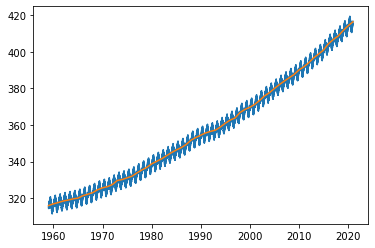

In [54]:
plt.plot(interpol_data_x, interpol_data_y)
plt.plot(x_yearly, y_yearly)

In [63]:
len(interpol_data_y)

22258

In [82]:
year_labels = []

for i in range(1959, 2021):
    year_labels += [j.replace('1991', str(i)) for j in yeardates]

In [83]:
len(interpol_data_y)

22258

In [84]:
interpol_data_dict = {'Year': year_labels, 'PPM': interpol_data_y}

In [85]:
interpol_data = pd.DataFrame(interpol_data_dict)

In [86]:
interpol_data.to_csv('../data/interpolated_data.csv', index=False)